In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import os

In [2]:
os.getcwd()

'/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie'

In [168]:
os.listdir('/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie')

file_list = []
label_list = []
for root,dirs,files in os.walk('/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie'):
    for file in files:
        if '.jpeg' in file:
            
            val = root.split('/')
            
            if 'NORMAL2' in val:
                label_list.append(0)
            else:
                label_list.append(1)
            
            file_list.append(os.path.join(root,file))
file_list

['/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/NORMAL2-IM-0927-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/NORMAL2-IM-1056-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/IM-0427-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/NORMAL2-IM-1260-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/IM-0656-0001-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/IM-0561-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/NORMAL2-IM-1110-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/IM-0757-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/NORMAL2-IM-1326-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/NORMAL2-IM-0736-0001.jpeg',
 '/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/NORMAL2/NORMAL2-IM-0500-0001.jpeg',
 '/U

In [52]:
val

['',
 'Users',
 'ahmed',
 'Desktop',
 'Kaggle',
 'Prediction_pneumonie',
 'train',
 'NORMAL']

In [12]:
img = PIL.Image.open('/Users/ahmed/Desktop/Kaggle/Prediction_pneumonie/train/PNEUMONIA/person1062_bacteria_2996.jpeg')
img = img.convert('L')
np.array(img).shape

(800, 952)

In [13]:
minimum = 1000
compteur = 0
for image in file_list:
    img = PIL.Image.open(image)
    shape = np.array(img).shape
    if min(shape[0],shape[1]) < minimum:
        minimum = min(shape[0],shape[1])
        
print(minimum)

127


In [172]:
df = []
for image in file_list:
    img = PIL.Image.open(image)
    img = img.resize((50,50))
    img = img.convert('L')
    df.append(np.array(img))

In [173]:
data = np.array(df)

In [174]:
data.shape

(5216, 50, 50)

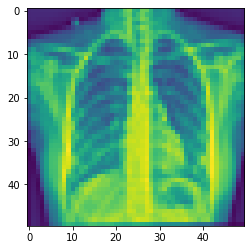

In [175]:
plt.imshow(data[0][0:50].reshape(50,50))

In [176]:
x,y,z = data.shape
data_r = data.reshape(x,y*z)
data_r = pd.DataFrame(data_r)

In [177]:
data_r.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,27,28,28,29,29,29,29,28,28,26,...,83,82,70,48,39,31,9,5,8,9
1,64,59,87,100,124,119,123,117,142,167,...,148,136,141,146,137,134,142,60,12,0
2,55,81,95,140,152,156,122,103,107,106,...,208,204,197,178,173,158,77,1,0,0
3,6,31,51,69,79,95,139,136,136,84,...,176,160,141,95,10,0,0,0,0,0
4,117,128,170,167,169,173,152,144,143,137,...,165,195,200,181,163,153,117,56,7,0


In [178]:
data_r.shape

(5216, 2500)

In [179]:
data_r['Label'] = label_list

In [180]:
data_r.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,Label
0,27,28,28,29,29,29,29,28,28,26,...,82,70,48,39,31,9,5,8,9,0
1,64,59,87,100,124,119,123,117,142,167,...,136,141,146,137,134,142,60,12,0,0
2,55,81,95,140,152,156,122,103,107,106,...,204,197,178,173,158,77,1,0,0,0
3,6,31,51,69,79,95,139,136,136,84,...,160,141,95,10,0,0,0,0,0,0
4,117,128,170,167,169,173,152,144,143,137,...,195,200,181,163,153,117,56,7,0,0


In [181]:
data_r['Label'].value_counts()

1    3875
0    1341
Name: Label, dtype: int64

In [182]:
X = data_r.drop(['Label'],axis=1)
y = data_r['Label']

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
from sklearn.model_selection import StratifiedKFold
accuracy = []

skf = StratifiedKFold(n_splits=20,random_state=None)
skf.get_n_splits(X,y)

for train_index,test_index in skf.split(X,y):
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]



In [185]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [192]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rUs = RandomOverSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)

In [205]:
model = make_pipeline(StandardScaler(),MLPClassifier())
model.fit(X_ru , y_ru)
model.score(X_test,y_test)

0.9674329501915708

In [206]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=3).mean()

0.9693192103398518

In [207]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [208]:
pred = model.predict(X_test)

In [209]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       269
           1       0.98      0.97      0.98       775

    accuracy                           0.97      1044
   macro avg       0.95      0.96      0.96      1044
weighted avg       0.97      0.97      0.97      1044



In [156]:
y_pred = model.predict_proba(X_test)
y_pred_new = []

for pred in y_pred[:,1]:
    if pred >= 0.48:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
        

pred = model.predict(X1_test)

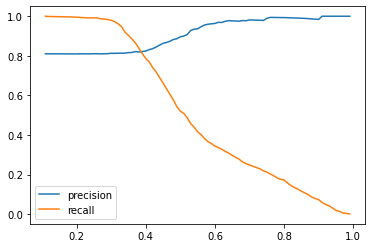

In [148]:
from sklearn.metrics import precision_recall_curve 

y_pred = model.predict_proba(X_test)
precision,recall,seuil = precision_recall_curve(y_test,y_pred[:,1])
plt.plot(seuil,precision[:-1],label='precision')
plt.plot(seuil,recall[:-1],label='recall')
plt.legend()

In [149]:
print(seuil)
print(recall)

idx = np.argmax(np.where(recall == 0.82,1,0))
seuil[idx]

[0.11 0.12 0.15 0.18 0.2  0.21 0.22 0.23 0.26 0.27 0.28 0.29 0.3  0.31
 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45
 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87
 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]
[1.         0.99881797 0.99763593 0.9964539  0.99527187 0.99408983
 0.9929078  0.99172577 0.99172577 0.98699764 0.9858156  0.98345154
 0.97990544 0.97281324 0.96217494 0.94799054 0.91962175 0.90307329
 0.88534279 0.86524823 0.8392435  0.8108747  0.78723404 0.76950355
 0.74113475 0.71867612 0.69030733 0.66312057 0.63356974 0.60520095
 0.57683215 0.54373522 0.52009456 0.50945626 0.48699764 0.45744681
 0.43971631 0.41607565 0.40189125 0.38179669 0.36643026 0.356974
 0.34397163 0.33687943 0.32742317 0.31678487 0.30851064 0.29669031
 0.28723404 0.27777778 0.26359338 0.25531915 0.24

0.11